### Sales prediction using ML

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset

d=pd.read_csv("Advertising.csv")

In [3]:
# To display first five rows

d.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# To display last five rows

d.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
# To display the columns

d.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
# To display basic information

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# Check for null values

d.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
# To check if there are any duplicates in the dataset.

d.duplicated().sum()

0

In [9]:
# To get the statistical insights

d.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
# Getting correlation matrix

d.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Unnamed: 0


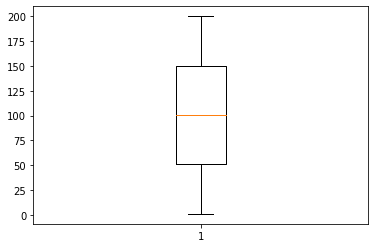

TV


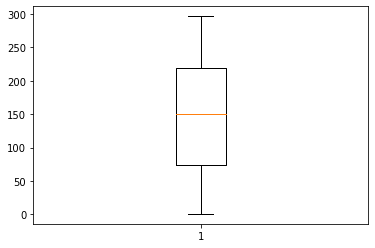

Radio


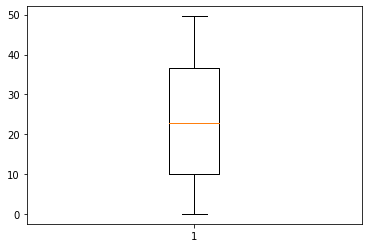

Newspaper


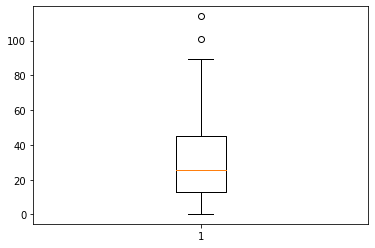

Sales


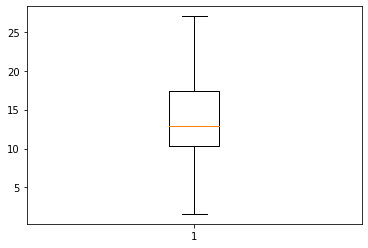

In [11]:
# Finding outliers using boxplot

col=['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']
for i in col:
    print(i)
    plt.boxplot(d[i])
    plt.show()

In [12]:
# Newspaper column contains some outliers.
# We can remove the outlier using interquartile range.

Unnamed: 0


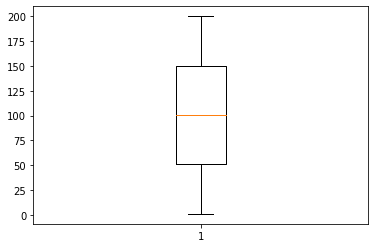

TV


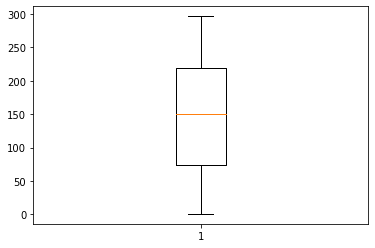

Radio


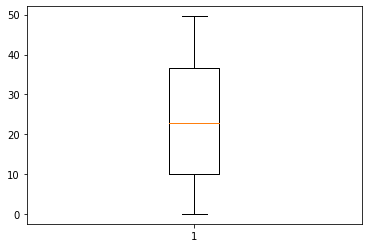

Newspaper


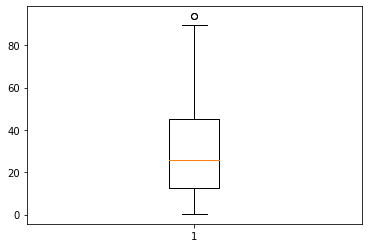

Sales


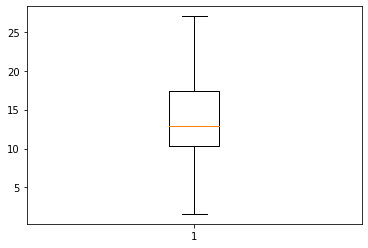

In [13]:
# Romoving outliers

for i in col:
    q1=np.percentile(d[i],25,interpolation='midpoint')
    q2=np.percentile(d[i],50,interpolation='midpoint')
    q3=np.percentile(d[i],75,interpolation='midpoint')
    iqr=q3-q1
    low=q1-1.5*iqr
    up=q3+1.5*iqr
    for j in d[i]:
        if j<low:
            d[i]=d[i].replace(j,low)
        elif j>up:
            d[i]=d[i].replace(j,up)
            
# Checking for outliers again

for i in col:
    print(i)
    plt.boxplot(d[i])
    plt.show()

In [14]:
# As you can see, the outliers has been removed.

In [15]:
# For model creation, split the dataset and store it into different variables.

y = d["Sales"]
X = d.drop("Sales",axis = 1)

In [16]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [17]:
# Using Linear Regression algorithm for predicting the sales values.

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
# Fit the model to the dataset

model.fit(X_train, y_train)



#To make the predictions

y_pred = model.predict(X_test)

In [19]:
#Model evaluation can be made using different metrics

print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("R-Squared score: ",metrics.r2_score(y_pred,y_test))

RMSE:  1.388105435814697
R-Squared score:  0.9161139479850747


The root mean squared error is less and the model is 0.91. So the model is accurate 91%. So the model can make good predictions.